In [ ]:
! git --version

git version 2.34.1


In [10]:
!git config --global user.email "hafiz.husain119@gmail.com"
!git config --global user.name "Hussain119"

Cloning into 'Colab'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [26]:
%cd Colab

/content/Colab/Colab


In [29]:
%ls

README.md


In [ ]:
cd '/content/drive/MyDrive/NN/S20'

/content/drive/MyDrive/NN/S20


In [ ]:
pip install livelossplot

In [ ]:
!pip install chemotools==0.0.10


In [ ]:
import os
import sys
from sys import stdout
from sklearn.linear_model import ARDRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io as sio
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model



# ## Use liveslossplot for training visualization in real time
# from livelossplot import PlotLossesKerasTF

ImportError: cannot import name 'newaxis' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

In [ ]:
dfs = pd.read_excel("Data_DLP.xlsx",  header=None)
df = dfs.drop(dfs.columns[0], axis=1)
X = df.values

array([[-0.39392286, -0.37661927, -0.35074757, ...,  0.18472926,
         0.19183771,  0.04459651],
       [-0.37667517, -0.35803629, -0.3333289 , ...,  0.15233778,
         0.16066899,  0.02913342],
       [-0.37722576, -0.36038045, -0.33683465, ...,  0.17308383,
         0.18026008,  0.04183677],
       ...,
       [-0.44703952, -0.43304784, -0.40566656, ...,  0.20358225,
         0.2148863 ,  0.05314332],
       [-0.46024878, -0.44388513, -0.4173992 , ...,  0.23999293,
         0.25728934,  0.07983125],
       [-0.45269532, -0.44110301, -0.42008496, ...,  0.23305144,
         0.2516293 ,  0.08410519]])

In [ ]:
from ChemUtils import EmscScaler

emsc = EmscScaler()

emsc.fit(X)

X_t = emsc.transform(X)

plt.figure()
plt.title('EMSC Corrected')
plt.plot(X_t.T)

ImportError: cannot import name 'newaxis' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

In [ ]:
df = pd.DataFrame(X_t)
from google.colab import files
df.to_csv('Day2_t.csv')
files.download('Day2_t.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfs = pd.read_excel("Data_clean.xlsx",  header=None)
X = dfs.values.T
T = pd.read_excel("Pro_clean.xlsx", header=None)
# y = T.Lact
Y = T.values
wave = pd.read_excel("wave_nm.xlsx",  header=None)
x_scale = wave.values
x_scale = x_scale[1:521]

In [ ]:
df = pd.read_excel("Data_clean.xlsx",  header=None)
X_val = df.values.T
R = pd.read_excel("Pro_clean.xlsx", header=None)
# y = T.Lact
Y_val = R.values

In [ ]:
import pywt
lev = 5
w = pywt.mra(dfs, 'haar', lev)
A,B,C,D,E,F = w
X = np.stack((A,B,C,D,E,F), axis=1)
len(X)

1320

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5642)

In [ ]:
from ChemUtils import GlobalStandardScaler
scaler = GlobalStandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# X_val_scaled = scaler.fit_transform(X_val)

In [ ]:
yscaler = GlobalStandardScaler()
y_train_scaled = yscaler.fit_transform(y_train)
y_test_scaled = yscaler.transform(y_test)
# y_val_scaled = yscaler.transform(Y_val)


In [ ]:
from ChemUtils import EmscScaler

emsc = EmscScaler()

emsc.fit(X_train_scaled)

X_train_emsc = emsc.transform(X_train_scaled)
X_test_emsc = emsc.transform(X_test_scaled)
# X_val_emsc = emsc.transform(X_val_scaled)

In [ ]:
#Expand dataset, Function also available in ChemUtils
def dataaugment(x, betashift = 0.05, slopeshift = 0.05,multishift = 0.05):
    #Shift of baseline
    #calculate arrays
    beta = np.random.random(size=(x.shape[0],1))*2*betashift-betashift
    slope = np.random.random(size=(x.shape[0],1))*2*slopeshift-slopeshift + 1
    #Calculate relative position
    axis = np.array(range(x.shape[1]))/float(x.shape[1])
    #Calculate offset to be added
    offset = slope*(axis) + beta - axis - slope/2. + 0.5

    #Multiplicative
    multi = np.random.random(size=(x.shape[0],1))*2*multishift-multishift + 1

    x = multi*x + offset

    return x

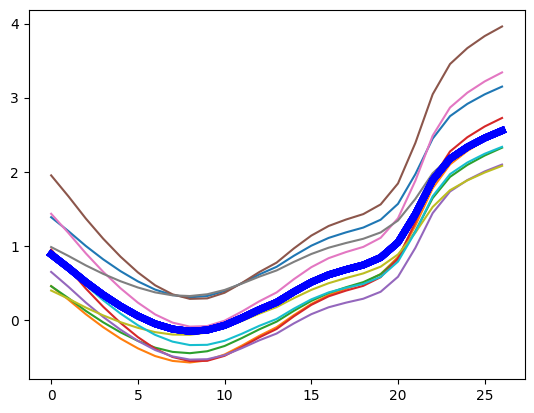

In [ ]:
#Data Augment a single spectrum

#First Spectrum
X = X_train_scaled[0:1]
#Repeating the spectrum 10x
X = np.repeat(X, repeats=10, axis=0)
#Augment (Large pertubations for illustration)
X_aug = dataaugment(X,betashift = 0.5, slopeshift = 0.5,multishift = 0.5)

plt.plot(X_aug.T)
_= plt.plot(X.T, lw=5, c='b')

In [ ]:
shift = np.std(X_train_scaled)*0.1
shift

0.1

In [ ]:
X_train_aug = np.repeat(X_train_scaled, repeats=25, axis=0)
X_train_aug = dataaugment(X_train_aug, betashift = shift, slopeshift = 0.05, multishift = shift)

y_train_aug = np.repeat(y_train_scaled, repeats=25, axis=0) #y_train is simply repeated

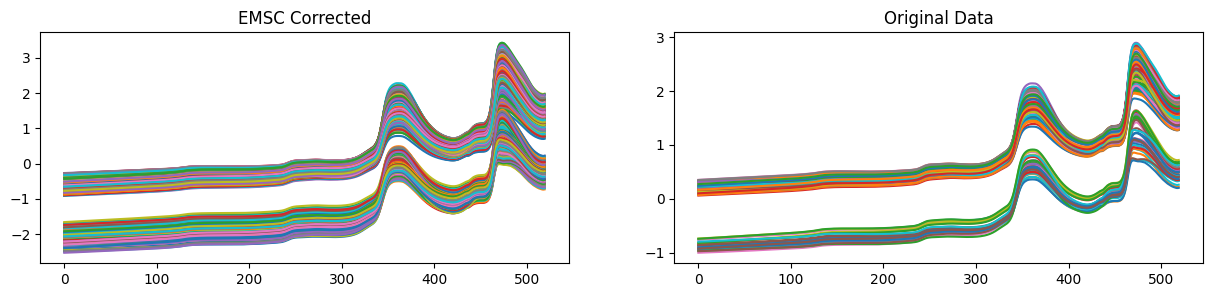

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.title('EMSC Corrected')
plt.plot(X_train_aug.T)
plt.subplot(122)
plt.title('Original Data')
plt.plot(X_train.T)
plt.show()

In [ ]:
df = pd.DataFrame(X_val_emsc)

In [ ]:
from google.colab import files
df.to_csv('Sample20.csv')
files.download('Sample20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Layers dimensions
INPUT_DIMS = np.shape(X_train_scaled)[1]
CONV1D_DIMS = INPUT_DIMS
K_NUMBER = 1
K_WIDTH = 5
K_STRIDE = 1
FC1_DIMS = 36
FC2_DIMS = 18
FC3_DIMS = 6
OUT_DIMS = 1

## L2 regularizer parameter
beta= 0.0003/256

## For the sake of simplicity we do the weights initialization for multiple layers here
## Due to this, we might have to re-run this cell before each experiment to ensure proper weight initialization each time
K_INIT = tf.keras.initializers.he_normal(seed=42)

## Weights L2 regularization
K_REG = tf.keras.regularizers.l2(beta)


model_cnn = keras.Sequential([  keras.layers.Reshape((INPUT_DIMS, 1),input_shape=(INPUT_DIMS,)), \
                                keras.layers.Conv1D(filters=K_NUMBER, \
                                                    kernel_size=K_WIDTH*2, \
                                                    strides=K_STRIDE, \
                                                    padding='same', \
                                                    kernel_initializer=K_INIT,\
                                                    kernel_regularizer=K_REG,\
                                                    activation='elu',\
                                                    input_shape=(CONV1D_DIMS,1)), \
                                keras.layers.Conv1D(filters=K_NUMBER, \
                                                    kernel_size=K_WIDTH, \
                                                    strides=K_STRIDE, \
                                                    padding='same', \
                                                    kernel_initializer=K_INIT,\
                                                    kernel_regularizer=K_REG,\
                                                    activation='elu',\
                                                    input_shape=(CONV1D_DIMS,1)), \
                                # keras.layers.Conv1D(filters=K_NUMBER, \
                                #                     kernel_size=K_WIDTH, \
                                #                     strides=K_STRIDE, \
                                #                     padding='same', \
                                #                     kernel_initializer=K_INIT,\
                                #                     kernel_regularizer=K_REG,\
                                #                     activation='elu',\
                                #                     input_shape=(CONV1D_DIMS,1)), \
                                keras.layers.Flatten(),
                                keras.layers.Dense(FC1_DIMS*2, \
                                                   kernel_initializer=K_INIT, \
                                                   kernel_regularizer=K_REG, \
                                                   activation='elu'),
                                keras.layers.Dense(FC1_DIMS, \
                                                   kernel_initializer=K_INIT, \
                                                   kernel_regularizer=K_REG, \
                                                   activation='elu'),
                                 keras.layers.Dropout(0.50),
                                # keras.layers.Dense(FC2_DIMS*2, \
                                #                    kernel_initializer=K_INIT,\
                                #                    kernel_regularizer=K_REG,\
                                #                    activation='elu'),
                                keras.layers.Dense(FC2_DIMS, \
                                                   kernel_initializer=K_INIT, \
                                                   kernel_regularizer=K_REG, \
                                                   activation='elu'),
                                # keras.layers.Dropout(0.5),
                                # keras.layers.Dense(FC2_DIMS, \
                                #                    kernel_initializer=K_INIT, \
                                #                    kernel_regularizer=K_REG, \
                                #                    activation='elu'),
                                # keras.layers.Dense(FC3_DIMS*2, \
                                #                    kernel_initializer=K_INIT, \
                                #                    kernel_regularizer=K_REG, \
                                #                    activation='elu'),
                                keras.layers.Dense(FC3_DIMS, \
                                                   kernel_initializer=K_INIT, \
                                                   kernel_regularizer=K_REG, \
                                                   activation='elu'),
                                keras.layers.Dense(1, kernel_initializer=K_INIT, \
                                                   kernel_regularizer=K_REG,\
                                                   activation='linear'),
                              ])

print(model_cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 520, 1)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 520, 1)            11        
                                                                 
 conv1d_3 (Conv1D)           (None, 520, 1)            6         
                                                                 
 flatten_1 (Flatten)         (None, 520)               0         
                                                                 
 dense_5 (Dense)             (None, 72)                37512     
                                                                 
 dense_6 (Dense)             (None, 36)                2628      
                                                                 
 dropout_1 (Dropout)         (None, 36)               

In [ ]:
!git --version

git version 2.34.1


In [ ]:
!git

In [ ]:
## plot losses in real time during training process
# plot_losses = PlotLossesKerasTF()

##### TRAIN MODEL WITH ADAM OPTIMIZER #########
BATCH=16
LR=0.0001

print('Adam learning rate = {}'.format(LR))
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='mse', metrics=['mse'])

### 1) Stop the training if it does not improve
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=100, mode='auto', restore_best_weights=True)
### 2) Reduce learning rate dynamically
rdlr = ReduceLROnPlateau(patience=50, factor=0.5, min_lr=1e-8, monitor='val_loss', verbose=0)
### 3) Save the best weights into file
checkpointer= keras.callbacks.ModelCheckpoint(filepath="Pro.h5", verbose=1, save_best_only=True)

## Train the model
h1=model_cnn.fit(X_train_emsc, y_train_scaled, batch_size=BATCH, epochs=5000, \
          validation_data=(X_test_emsc, y_test_scaled),  \
          callbacks=[checkpointer, rdlr,early_stop],verbose=1)

tf.keras.backend.clear_session()

Adam learning rate = 0.0001
Epoch 1/5000
65/66 [============================>.] - ETA: 0s - loss: 1.0697 - mse: 1.0694
Epoch 1: val_loss improved from inf to 0.96079, saving model to Pro.h5
66/66 [==============================] - 3s 14ms/step - loss: 1.0730 - mse: 1.0727 - val_loss: 0.9608 - val_mse: 0.9605 - lr: 1.0000e-04
Epoch 2/5000
 9/66 [===>..........................] - ETA: 0s - loss: 0.7894 - mse: 0.7891

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
Epoch 794/5000
63/66 [===========================>..] - ETA: 0s - loss: 0.2536 - mse: 0.2532
Epoch 794: val_loss did not improve from 0.18434
66/66 [==============================] - 1s 15ms/step - loss: 0.2551 - mse: 0.2546 - val_loss: 0.1964 - val_mse: 0.1959 - lr: 1.0000e-04
Epoch 795/5000
65/66 [============================>.] - ETA: 0s - loss: 0.2712 - mse: 0.2707
Epoch 795: val_loss did not improve from 0.18434
66/66 [==============================] - 1s 12ms/step - loss: 0.2702 - mse: 0.2698 - val_loss: 0.1939 - val_mse: 0.1934 - lr: 1.0000e-04
Epoch 796/5000
63/66 [===========================>..] - ETA: 0s - loss: 0.2629 - mse: 0.2625
Epoch 796: val_loss did not improve from 0.18434
66/66 [==============================] - 1s 13ms/step - loss: 0.2622 - mse: 0.2618 - val_loss: 0.2262 - val_mse: 0.2258 - lr: 1.0000e-04
Epoch 797/5000
63/66 [===========================>..] - ETA: 0s - loss: 0.2431 - mse: 0.2426
Epoch 797: val_loss

In [ ]:
model_cnn.save('my_model.keras')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1062, 1)           0         
                                                                 
 conv1d (Conv1D)             (None, 1062, 1)           6         
                                                                 
 flatten (Flatten)           (None, 1062)              0         
                                                                 
 dense (Dense)               (None, 36)                38268     
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 6)                 1

In [ ]:
plot_losses = PlotLossesKerasTF()

##### TRAIN MODEL WITH ADAM OPTIMIZER #########
BATCH=256
LR=0.001

print('Adam learning rate = {}'.format(LR))
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='mse', metrics=['mse'])


In [ ]:
model_cnn.load_weights('Pro.h5')
y_pred = model_cnn.predict(X_test_emsc)
y_pred_1 = yscaler.inverse_transform(y_pred)
r2 = r2_score(y_test_scaled, y_pred)
rms = mean_squared_error(y_test_scaled, y_pred)
print(rms)
print(r2)


9/9 [==============================] - 0s 4ms/step
0.14521031882765453
0.8474890074823364


In [ ]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

<ipython-input-21-e9c672e6619e>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_range = int(max(y_test))


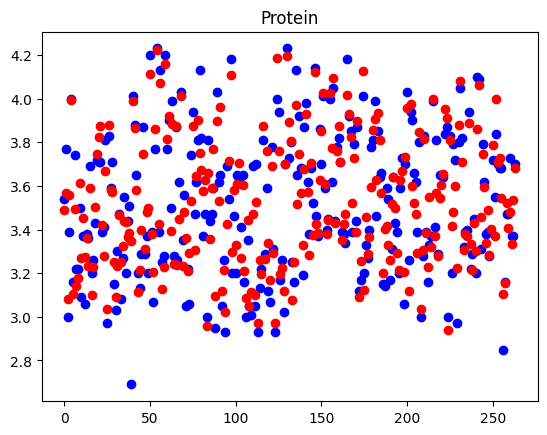

In [ ]:
plotGraph(y_test, y_pred_1, "Protein")

In [ ]:
model_cnn.load_weights('lac.h5')
y_pred = model_cnn.predict(X_train_scaled)
y_pred_1 = yscaler.inverse_transform(y_pred)
r2 = r2_score(y_train_scaled, y_pred)
rms = mean_squared_error(y_train_scaled, y_pred)
print(rms)
print(r2)

7/7 [==============================] - 0s 6ms/step
0.04455246055090998
0.95544753944909


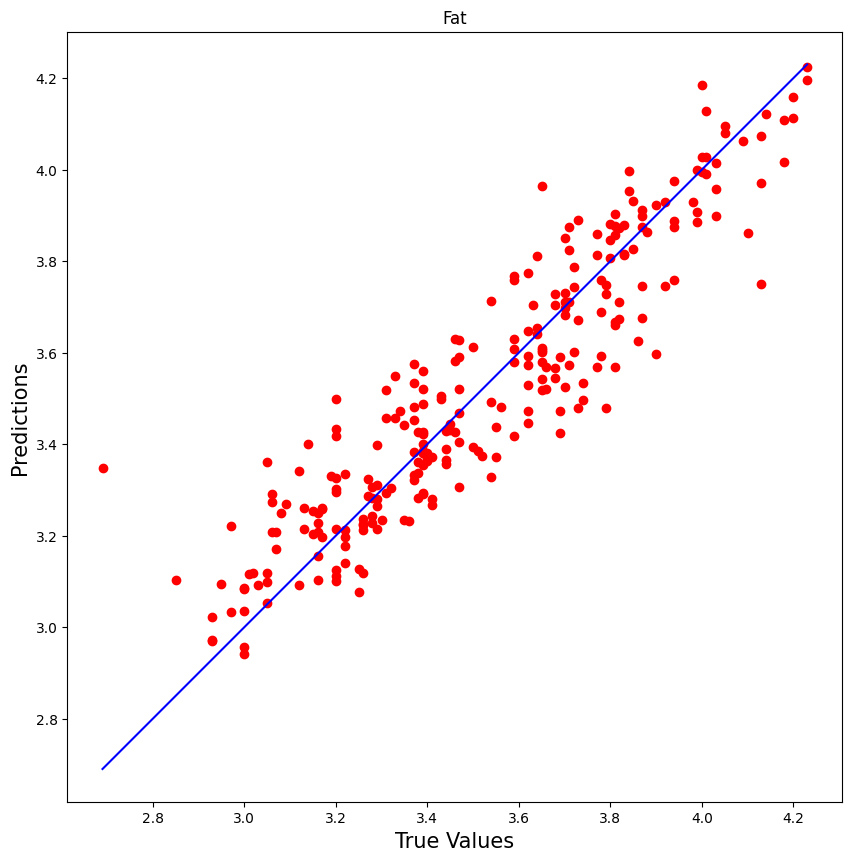

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test , y_pred_1, c='red')


p1 = max(max(y_pred_1), max(y_test))
p2 = min(min(y_pred_1), min(y_test))
plt.plot((p1, p2), (p1, p2), 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Fat')
plt.axis('equal')
plt.show()


In [ ]:
cnn_pred=model_cnn.predict(X_test_scaled)

x_subset_cnn=X_test_scaled[:30,:]
y_subset_cnn=cnn_pred[:30,:].copy()
epsilon=1E-5
w_cnn = np.zeros((x_subset_cnn.shape[0],x_subset_cnn.shape[1]))
for i in np.arange(x_subset_cnn.shape[1]):
    ## create array with wavelenghts (aka features)
    x_pert_cnn=x_subset_cnn.copy()
    ##x_pert_pls=x_subset_pls.copy()
    ## apply epsilon pertubation to feature i only
    x_pert_cnn[:,i]=x_subset_cnn[:,i]+epsilon
    ##x_pert_pls[:,i]=x_subset_pls[:,i]+epsilon
    ## compute new model prediction where the input is the locally perturbed spectra
    y_pred_pert_cnn=model_cnn.predict(x_pert_cnn)
    ##y_pred_pert_pls=pls_model.predict(x_pert_pls)
    ## compute the regression coefficients
    w_cnn[:,i]= (y_pred_pert_cnn[:,0] - y_subset_cnn[:,0])/epsilon
    ##w_pls[:,i]= (y_pred_pert_pls[:,0] - y_subset_pls[:,0])/epsilon

1/1 [==============================] - 0s 30ms/step


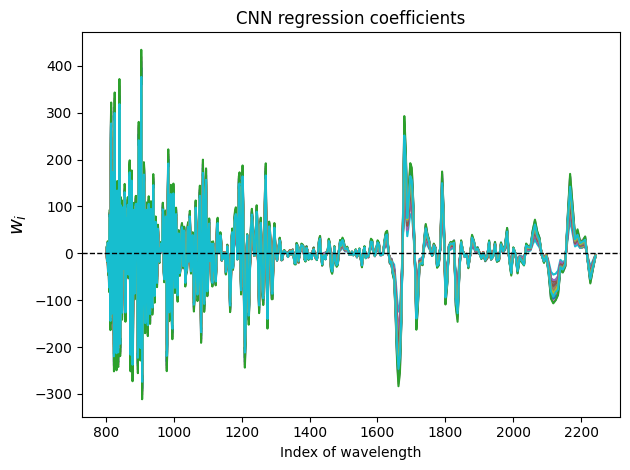

In [ ]:
plt.plot(x_scale,w_cnn.T)
plt.title('CNN regression coefficients')
plt.ylabel(r'$w_i$', fontsize=14)
plt.axhline(0, lw='1',ls='dashed',c='k')
plt.xlabel('Index of wavelength')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import models

# get the first 3 layers from the trained model (the input layer doesnt count!)
layers_outputs = [layer.output for layer in model_cnn.layers[:3]]

# define a sub-model based on the selected layers
activation_model = models.Model(inputs=model_cnn.input, outputs=layers_outputs)

# compute the activations as the output of that sub-model. Here we feed x_test2_emsc data to that submodel
activations = activation_model.predict(X_test_scaled)

# The last element of the "activations" var correspond to the outputs of
# conv1d layer and has dimensions (Nsamples, SampleSize-FilterSize+1, Nfilters)

# activations for the first conv1d layer
conv1d_activations = activations[2]

print(conv1d_activations.shape)
print(activation_model.summary())

3/3 [==============================] - 0s 7ms/step
(66, 520, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_input (InputLayer)  [(None, 520)]             0         
                                                                 
 reshape (Reshape)           (None, 520, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 520, 1)            11        
                                                                 
 conv1d_1 (Conv1D)           (None, 520, 1)            6         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


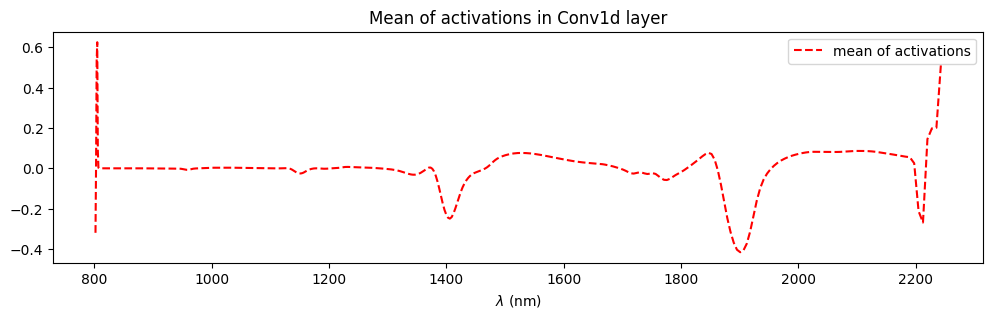

In [ ]:
plt.figure(figsize=(12,3))
ax=plt.subplot()
plt.title('Mean of activations in Conv1d layer')
## get lims for imshow
extent=[min(x_scale), max(x_scale),-2,2]
## plot just activation for sample 1
#ax.imshow(conv1d_activations[1, : , 0][np.newaxis,:], cmap="RdBu", aspect="auto", extent=extent)
## plot the mean activation (over all samples) as a bluish background
# ax.imshow(np.abs(np.mean(conv1d_activations[:, : , 0],axis=0)[np.newaxis,:]), cmap="Blues", aspect="auto",label='dd')
## plot the mean of the activations
plt.plot(x_scale, np.mean(conv1d_activations[: , :, 0],axis=0), 'r--', label='mean of activations')
## plot the mean of the test spectra
# plt.plot(x_scale, np.mean(X_test_scaled, axis=0),'k',label='mean input spectrum')
plt.xlabel(r'$\lambda$ (nm)')
plt.legend()
plt.show()

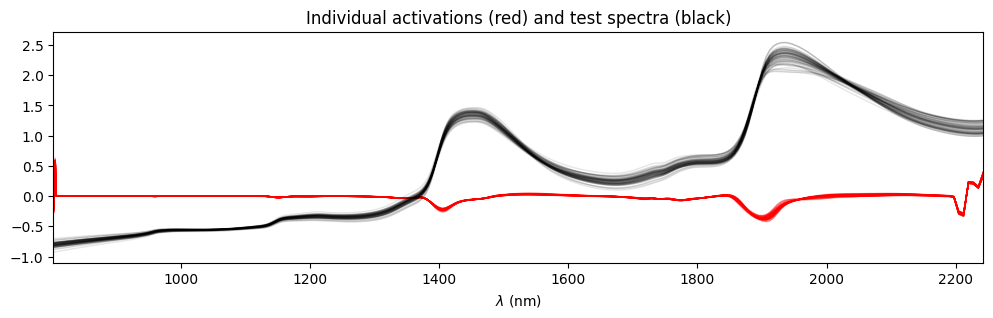

In [ ]:
plt.figure(figsize=(12,3))
ax1=plt.subplot()
plt.title('Individual activations (red) and test spectra (black)')
# ax.plot(x_scale, np.mean(conv1d_activations[: , :, 0],axis=0), 'r--', label='mean of activations')
g1=ax1.plot(x_scale, conv1d_activations[: , :, 0].T, 'r-', lw=1, alpha=0.2, label='activations')
# ax.plot(x_scale, np.mean(x_test_scaled_rowcol, axis=0),'k',label='input spectra')
g2=ax1.plot(x_scale, X_test_emsc.T,'k',alpha=0.1, lw=1,label='mean input spectrum')
plt.xlim(min(x_scale), max(x_scale))
plt.xlabel(r'$\lambda$ (nm)')
plt.show()

## Compute first derivative of test spectra
x_test_scaled_rowcol_1stderiv= savgol_filter(x_test_scaled_rowcol,3,2,deriv=1)

plt.figure(figsize=(12,3))
ax=plt.subplot()
plt.title('Mean of activations (red) and 2 x mean of 1st derivative')
## get lims for imshow
extent=[min(x_scale), max(x_scale),-2,2]
## plot the mean of the activations
plt.plot(x_scale, np.mean(conv1d_activations[: , :, 0],axis=0), 'r--', label='mean of activations')
## plot the mean of the 1st derivative of spectra
plt.plot(x_scale, 2*np.mean(x_test_scaled_rowcol_1stderiv, axis=0),'k',label='2 x mean of 1st derivative of spectrum')
plt.xlabel(r'$\lambda$ (nm)')
plt.ylim(-0.5,1)
plt.legend()
plt.show()

In [ ]:
 def optimise_pls_cv(X, y, n_comp, plot_components=True):

    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''

    mse = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)

        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)

        mse.append(mean_squared_error(y, y_cv))

        comp = 100*(i+1)/n_comp
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")

    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)

        plt.show()

    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)

    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)

    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')

        plt.show()

    return

In [ ]:
model = tf.keras.models.load_model('my_model.keras')

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1062, 1)           0         
                                                                 
 conv1d (Conv1D)             (None, 1062, 1)           6         
                                                                 
 flatten (Flatten)           (None, 1062)              0         
                                                                 
 dense (Dense)               (None, 36)                38268     
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 6)                 1

In [ ]:
new_model = Sequential([
        layer for layer in model.layers if layer != model.layers[0]

])
new_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
def change_input_size(model,h,w,ch=3):
   model._layers[0]._batch_input_shape = (None,520)
   new_model = keras.models.model_from_json(model.to_json())
   new_model.summary()
   for layer,new_layer in zip(model.layers,new_model.layers):
      new_layer.set_weights(layer.get_weights())
   return new_model


AttributeError: 'Sequential' object has no attribute '_layers'